In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Weddell_Extent = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Weddell_Extent)
fp.date_time(Weddell_Extent)

,Extent,Date
0,2136510.859,1979-01-01
1,1243495.891,1979-02-01
2,1699053.449,1979-03-01
3,2617442.085,1979-04-01
4,3852934.206,1979-05-01
...,...,...
533,3668127.143,2023-06-01
534,4805519.784,2023-07-01
535,5524445.234,2023-08-01
536,6006669.861,2023-09-01


In [5]:
scaler = MinMaxScaler()
Weddell_Extent['Extent'] = scaler.fit_transform(Weddell_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 5
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Weddell_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((522, 12, 1), (522,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Weddell_model_LT5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.3221 - root_mean_squared_error: 0.5676

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 8s 97ms/step - loss: 0.3211 - root_mean_squared_error: 0.5667 - val_loss: 0.2800 - val_root_mean_squared_error: 0.5291
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.2242 - root_mean_squared_error: 0.4735

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.2224 - root_mean_squared_error: 0.4715 - val_loss: 0.2363 - val_root_mean_squared_error: 0.4861
Epoch 3/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1821 - root_mean_squared_error: 0.4268

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.1773 - root_mean_squared_error: 0.4210 - val_loss: 0.1984 - val_root_mean_squared_error: 0.4455
Epoch 4/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1438 - root_mean_squared_error: 0.3792

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.1439 - root_mean_squared_error: 0.3793 - val_loss: 0.1623 - val_root_mean_squared_error: 0.4029
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1130 - root_mean_squared_error: 0.3361

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1157 - root_mean_squared_error: 0.3401 - val_loss: 0.1360 - val_root_mean_squared_error: 0.3687
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0931 - root_mean_squared_error: 0.3051

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0931 - root_mean_squared_error: 0.3051 - val_loss: 0.1100 - val_root_mean_squared_error: 0.3316
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0680 - root_mean_squared_error: 0.2608

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0680 - root_mean_squared_error: 0.2607 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2942
Epoch 8/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0569 - root_mean_squared_error: 0.2385

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0557 - root_mean_squared_error: 0.2360 - val_loss: 0.0733 - val_root_mean_squared_error: 0.2708
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0420 - root_mean_squared_error: 0.2050

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0418 - root_mean_squared_error: 0.2044 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2359
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0361 - root_mean_squared_error: 0.1900

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1935
Epoch 11/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.1525

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1805
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0242 - root_mean_squared_error: 0.1554

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0236 - root_mean_squared_error: 0.1537 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0201 - root_mean_squared_error: 0.1418

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0194 - root_mean_squared_error: 0.1394 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1232
Epoch 14/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1256

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1345

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1121

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0667
Epoch 17/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1110

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 19/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 20/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.1031

INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


INFO:tensorflow:Assets written to: Weddell_model_LT5\assets


53/53 [==============================] - 6s 106ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 22/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0166 - root_mean_squared_error: 0.1287 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0131 - val_root_mean_square

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.661699366569519 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

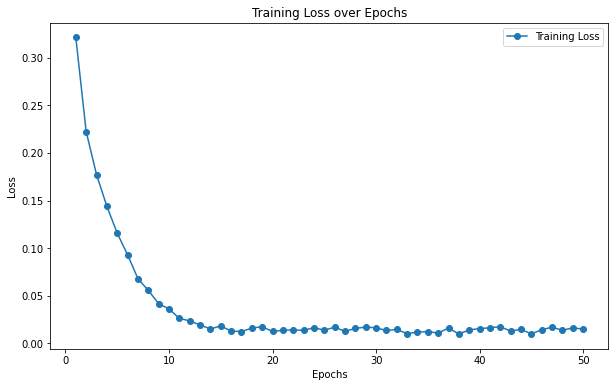

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

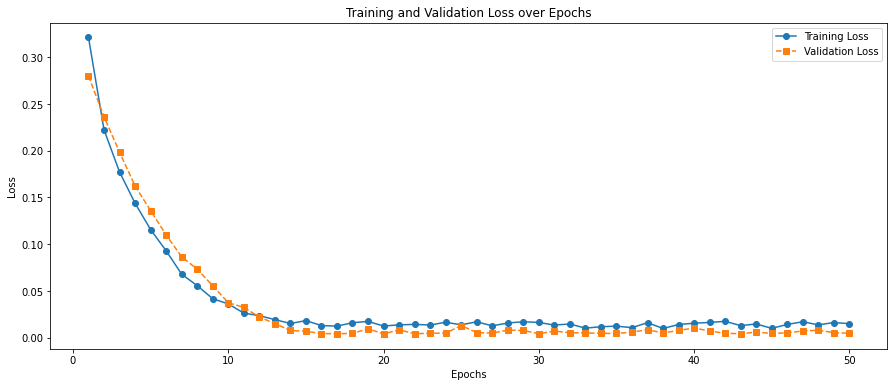

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Weddell_model_LT5/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.057444454611339194
MAE : 0.04706785817227021


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,6330630.000,6669726.076
1,6184232.000,6516136.854
2,5687724.000,5902163.675
3,4011622.750,3498103.449
4,2311530.000,1633675.726
5,1149700.625,1292668.399
6,1545771.375,1527666.815
7,2257698.250,2121949.701
8,3504288.250,3562381.775
9,4856168.500,5004305.983


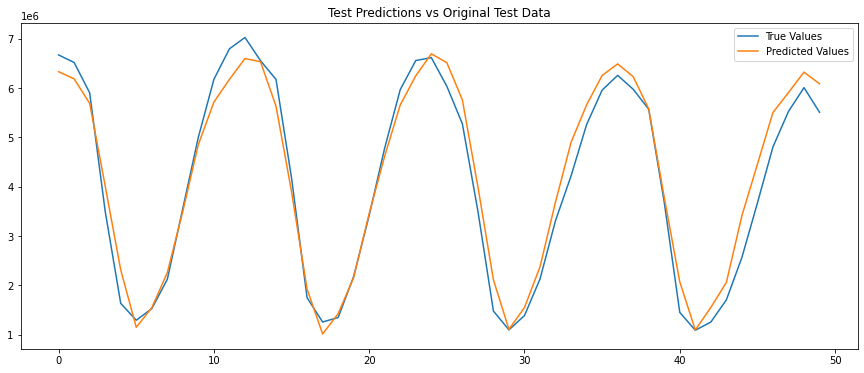

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

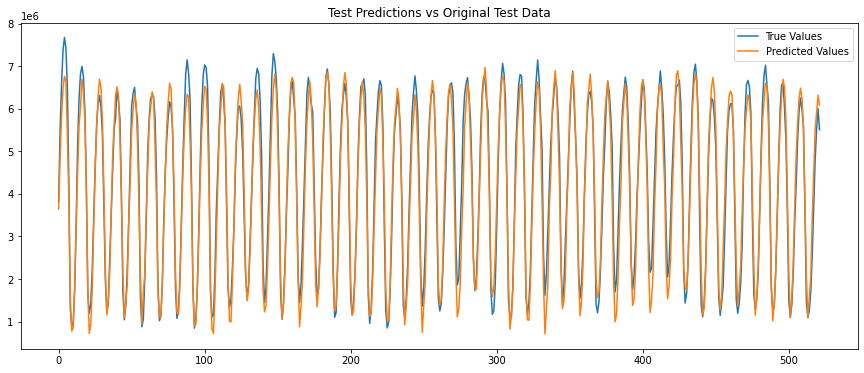

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()